In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bXwBlHDEyDlm1YNXVICPH7mDgwVXS3Fz-WFIahDn2zul',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitalnaturalistproject-donotdelete-pr-bx4lj68kfaymwk'
object_key = 'Digital Naturalist Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [10]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [11]:
ls

'Digital Naturalist Dataset'/


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/Digital Naturalist Dataset/", target_size =(64,64), batch_size = 5, class_mode = "categorical")

Found 138 images belonging to 3 classes.


In [16]:
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/Digital Naturalist Dataset/",target_size=(64,64), batch_size=32, class_mode="categorical")

Found 138 images belonging to 3 classes.


In [17]:
x_train.class_indices

{'Bird': 0, 'Flower': 1, 'Mammal': 2}

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D  
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [19]:
model = Sequential()

In [20]:
model.add(Convolution2D(32,(3,3), activation="relu", input_shape=(64,64,3)))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [24]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [25]:
model.add(Dense(units=3,kernel_initializer="random_uniform",activation="softmax"))

In [26]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [27]:
model.fit_generator(x_train, steps_per_epoch=5, epochs=25, validation_data= x_test, validation_steps=5)

Epoch 1/25


/tmp/wsuser/ipykernel_164/3547286368.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=5, epochs=25, validation_data= x_test, validation_steps=5)


5/5 [==============================] - 2s 329ms/step - loss: 1.5032 - accuracy: 0.1304 - val_loss: 1.1842 - val_accuracy: 0.3406
Epoch 2/25
5/5 [==============================] - 1s 236ms/step - loss: 1.2605 - accuracy: 0.1739 - val_loss: 1.1096 - val_accuracy: 0.5072
Epoch 3/25
5/5 [==============================] - 1s 245ms/step - loss: 1.2237 - accuracy: 0.1304 - val_loss: 1.0571 - val_accuracy: 0.4565
Epoch 4/25
5/5 [==============================] - 1s 257ms/step - loss: 1.1349 - accuracy: 0.4400 - val_loss: 1.1800 - val_accuracy: 0.3043
Epoch 5/25
5/5 [==============================] - 1s 251ms/step - loss: 1.2061 - accuracy: 0.2400 - val_loss: 1.0435 - val_accuracy: 0.4928
Epoch 6/25
5/5 [==============================] - 1s 241ms/step - loss: 1.0803 - accuracy: 0.4000 - val_loss: 1.0185 - val_accuracy: 0.5725
Epoch 7/25
5/5 [==============================] - 1s 244ms/step - loss: 1.0110 - accuracy: 0.6800 - val_loss: 0.9866 - val_accuracy: 0.4928
Epoch 8/25
5/5 [===============

In [28]:
model.save("dataset.h5")

In [29]:
!pip install watson-machine-learning-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 50.6 MB/s eta 0:00:00


In [30]:
from ibm_watson_machine_learning import APIClient

In [31]:
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "rGruqvXSPcyRiIYxkWks6yIDkdT3y0pLgPPR80CstWQM" 
}

In [32]:
client=APIClient(wml_credentials)

In [33]:
client

In [34]:
def guid_space_name(client,Naturalist_deploy):
    space=client.spaces.get_detalis()
    return(next(item for item in space['resources'] if item['entity']['name']==Naturalist_deploy)['metadata']['id'])

In [35]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------------  ------------------------
ID                                    NAME                           CREATED
bb6bc038-faf9-4064-9a5e-0ed949bf2a8c  Digital Naturalist-deployment  2022-11-17T14:39:09.170Z
------------------------------------  -----------------------------  ------------------------


In [36]:
space_id ="bb6bc038-faf9-4064-9a5e-0ed949bf2a8c"

In [37]:
client.set.default_space(space_id)

'SUCCESS'

In [38]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [39]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [40]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [41]:
ls

 dataset.h5  'Digital Naturalist Dataset'/


In [42]:
!tar -zcvf dataset-classification-model.tgz dataset.h5

dataset.h5


In [43]:
model_details=client.repository.store_model(model='dataset-classification-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"dataset Model Building",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid,
})

In [44]:
model_id=client.repository.get_model_id(model_details)

In [45]:
model_id

'b58ceafb-e7ea-4c5e-adb3-88f27534d71c'

In [46]:
client.repository.download(model_id,'dataset.tar.gb')

Successfully saved model content to file: 'dataset.tar.gb'


'/home/wsuser/work/dataset.tar.gb'

In [47]:
ls

 dataset-classification-model.tgz   dataset.tar.gb
 dataset.h5                        'Digital Naturalist Dataset'/


In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("dataset.h5")

In [49]:
from tensorflow.keras.utils import img_to_array
img = image.load_img(r'/home/wsuser/work/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird/images (7).jpg', grayscale = False, target_size =(64,64)) #loading the image
x = img_to_array(img) #image to array
x = np.expand_dims(x,axis = 0)
predict_x=model.predict(x) 
classes_x=np.argmax(predict_x,axis=-1)
classes_x

1/1 [==============================] - 0s 93ms/step


array([0])

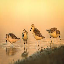

In [50]:
img

In [51]:
index=['Great Indian Bustard Bird', 'Spoon Billed Sandpiper Bird', 'Corpse Flower','Lady Slipper Orchid Flower','Pangolin Mammal','Senenca White Deer Mammal']
result=str(index[classes_x[0]])
result

'Great Indian Bustard Bird'